# MLP example for boolean function

In [43]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([[0,0,1,1],
            [0,1,0,1],
            [1,1,1,1]])
Y=np.array([[1,0,0,1]])

# model specifications
Ni=3; Nh=4; No=1;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))


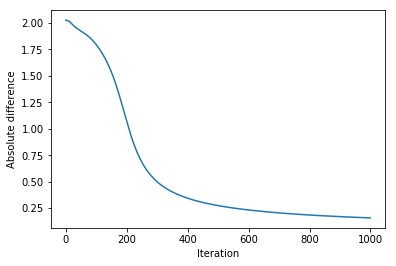

In [44]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()


In [1]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(77):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after training model with 50% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

NameError: name 'dwo' is not defined